# **Heartbeat sounds**

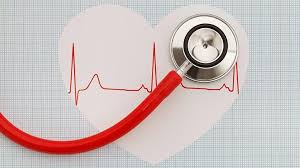

Heart sounds are produced from a
specific cardiac event such as closure of
a valve or tensing of a chordae
tendineae.

• S1 result from the closing of the mitral
and tricuspid valves.

• S2 produced by the closure of the aortic
and pulmonic valves. 

In medicine we call the ‘lub’
sound "S1" and the ‘dub’ sound
"S2". 

**Why using Deep Learning in this ?**

It is a subset of Neural Networks ( a computing systems which is insprired by biological neural networks ). And by stacking a lot of Neural Networks layers, we will get a Deep Learning model which might contains multiple billions parameters and is capable of handle very complicated problems that no classical algorithm can be effective.


Deep Learning is especially powerful with unstructrured data (Image, Text, Sound, Video, …).


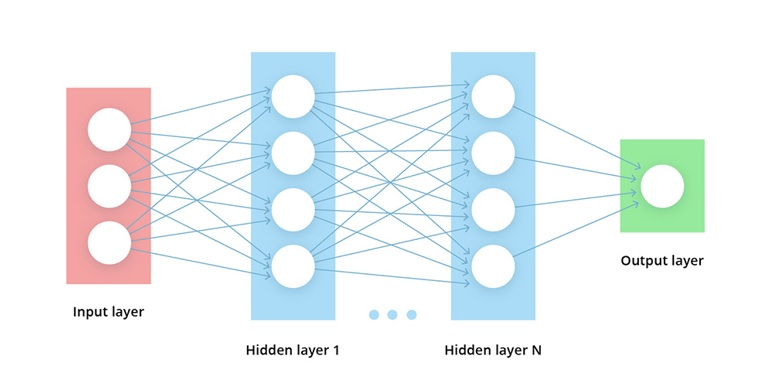

In [ ]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import json
import math
import tensorflow as tf
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/heartbeat_sounds/"
print(os.listdir(data_path))

['unlabel', 'normal', 'murmur', 'extrastole', 'artifact', 'extrahls']


In [ ]:
tarin_data      = data_path 
val_data        = data_path  + "/unlabel/"

normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'
extrastole_data = tarin_data + '/extrastole/'
artifact_data   = tarin_data + '/artifact/'
extrahls_data   = tarin_data + "/extrahls/"

In [ ]:
print(len(os.listdir(normal_data))) #length of normal training sounds
print(len(os.listdir(murmur_data))) #length of murmur training sounds 
print(len(os.listdir(extrastole_data))) #length of extrastole training sounds 
print(len(os.listdir(artifact_data))) #length of artifact training sounds 
print(len(os.listdir(extrahls_data))) #length of extrahls training sounds 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

351
129
39
40
19
TOTAL TRAIN SOUNDS: 578


In [ ]:
print("Test sounds: ", len(os.listdir(val_data)))

Test sounds:  254


# EDA and Visualization

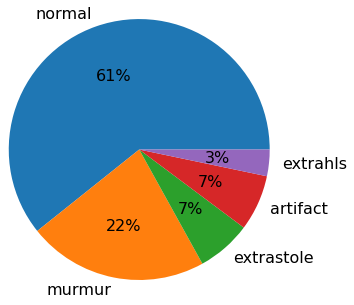

In [ ]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

##### the figure shows imbalanced data so we need to fix it later 


## *visualizing random sample*

In [ ]:
def visulize_random_sample(folder_name):
  #to hear the audio sample
  random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
  sample_sound              = os.listdir(folder_name)[random_sample]
  sample_address            = folder_name + sample_sound
  sample_sound, sample_rate = librosa.load(sample_address)
  sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
  return sample_audio


In [ ]:
visulize_random_sample(normal_data)

## *1. Normal sound*

Most normal heart rates at rest
will be between about 60 and
100 beats (‘lub dub’s) per
minute. 

In [ ]:
# Choose random soud from normal folder
random_normal= np.random.randint(0,len(os.listdir(normal_data))) 
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)

### Waveform

Sound is the pressure of air propagates to our ear. Digital audio file is gotten from a sound sensor that can detects sound waves and converting it to electrical signals.


Specifically, it's telling us about the wave's displacement, and how it changes over time.


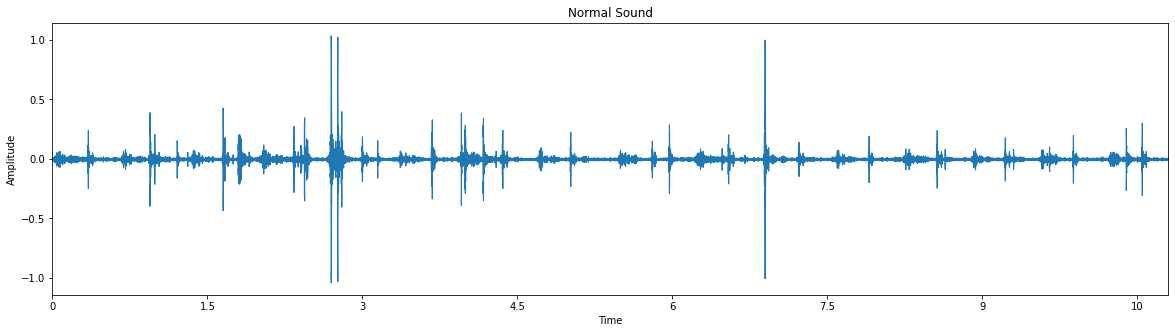

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(normal_sound_sample, sr = sample_rate)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

X axis, represents time.
Y-axis measures displacement of air molecules.This is where amplitude comes in. It measures how much a molecule is displaced from its resting position.  

### Spectrum

A sound spectrum is a representation of a sound – usually a short sample of a sound – in terms of the amount of vibration at each individual frequency. It is usually presented as a graph of either power or pressure as a function of frequency. The power or pressure is usually measured in decibels and the frequency is measured in vibrations per second (or hertz, abbreviation Hz) or thousands of vibrations per second (kilohertz, abbreviation kHz).

The spectrum expresses the frequency composition of the sound and is obtained by analyzing the sound. A sound spectrum is usually represented in a coordinate plane where the frequency f is plotted along the axis of abscissas and the amplitude A, or intensity, of a harmonic component with a given frequency is plotted along the axis of ordinates.

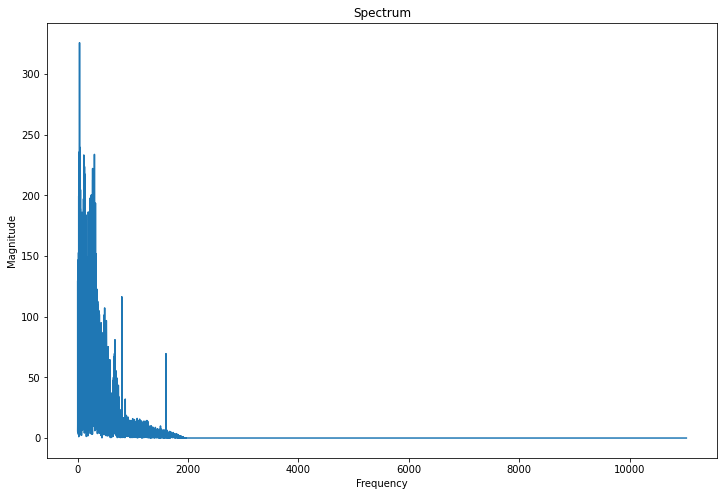

In [ ]:
fft_normal = np.fft.fft(normal_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

For us, as human, we sense a sound not only on a particular time by its intensity, but also by its pitch. The pitch is the frequency of the sound - higher pitch corresponding to higher frequency and vice versa. So, to have a representation which is closer to our brain, we can add another dimension - the frequency - to our representation, which is the Spectrogram.

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.

Spectrograms are used extensively in the fields of music, linguistics, sonar, radar, speech processing,seismology, and others. Spectrograms of audio can be used to identify spoken words phonetically, and to analyse the various calls of animals.it can be generated by an optical spectrometer, a bank of band-pass filters, by Fourier transform or by a wavelet transform.

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

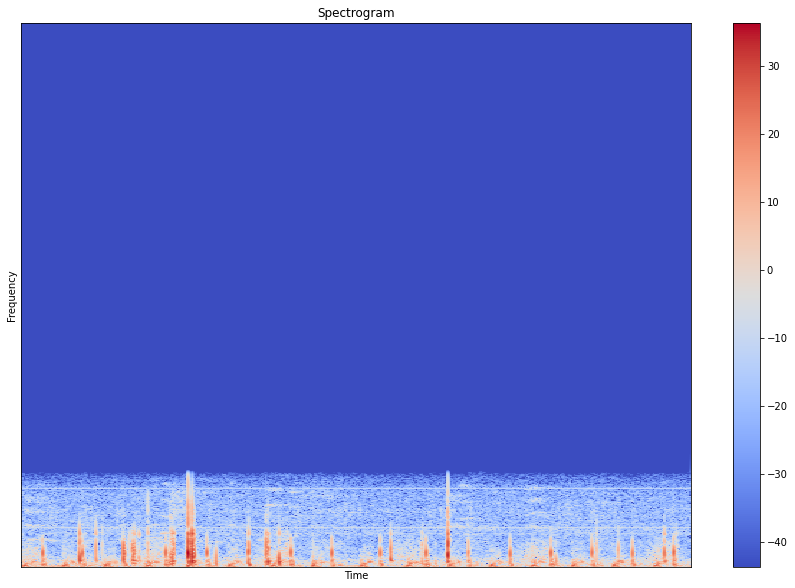

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

we have an image that represents a sound. X-axis is for time, y-axis is for frequency and the color is for intensity

In [ ]:
spectrogram.shape

(1025, 466)

### MFCCs

Speech Recognition is a supervised learning task. In the speech recognition problem input will be the audio signal and we have to predict the text from the audio signal. We can’t take the raw audio signal as input to our model because there will be a lot of noise in the audio signal. It is observed that extracting features from the audio signal and using it as input to the base model will produce much better performance than directly considering raw audio signal as input. MFCC is the widely used technique for extracting the features from the audio signal.

in sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC. They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum. This frequency warping can allow for better representation of sound, for example, in audio compression.

**MFCCs are commonly derived as follows:**

1- Take the Fourier transform of (a windowed excerpt of) a signal.

2- Map the powers of the spectrum obtained above onto the mel scale, using triangular overlapping windows or alternatively, cosine overlapping windows.

3- Take the logs of the powers at each of the mel frequencies.

4- Take the discrete cosine transform of the list of mel log powers, as if it were a signal.

5- The MFCCs are the amplitudes of the resulting spectrum.

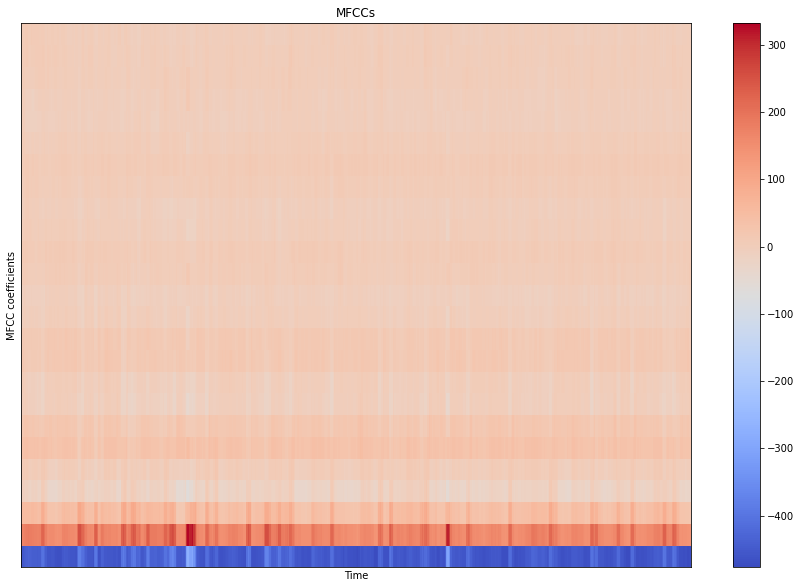

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(normal_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

## *2. Murmur sound*

Heart murmurs sound as though there
is a “whooshing, roaring, rumbling, or
turbulent fluid” noise in one of two
temporal locations: (1) between “lub”
and “dub”, or (2) between “dub” and
“lub”. They can be a symptom of many
heart disorders, some serious. 

In [ ]:
  # Choose random soud from murmur folder
random_murmur= np.random.randint(0,len(os.listdir(murmur_data))) 
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)

### Waveform

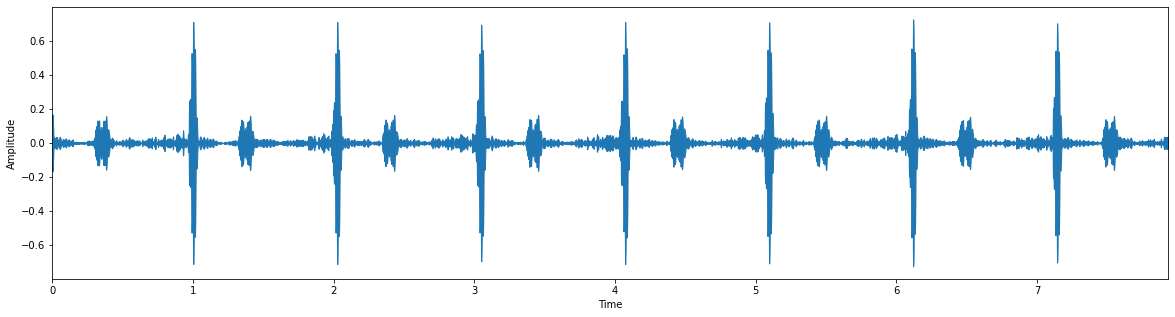

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(murmur_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

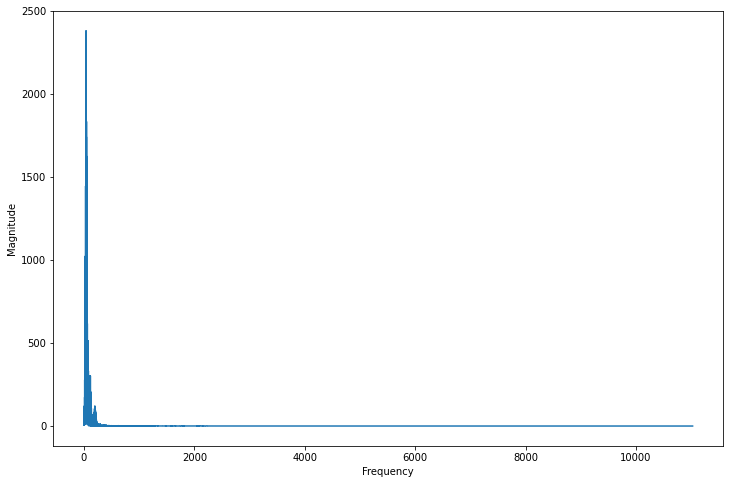

In [ ]:
fft_murmur = np.fft.fft(murmur_sound_sample)
magnitude_murmur = np.abs(fft_murmur)
freq_murmur = np.linspace(0,sample_rate, len(magnitude_murmur)) 
half_freq = freq_murmur[:int(len(freq_murmur)/2)]
half_magnitude = magnitude_murmur[:int(len(freq_murmur)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_murmur')

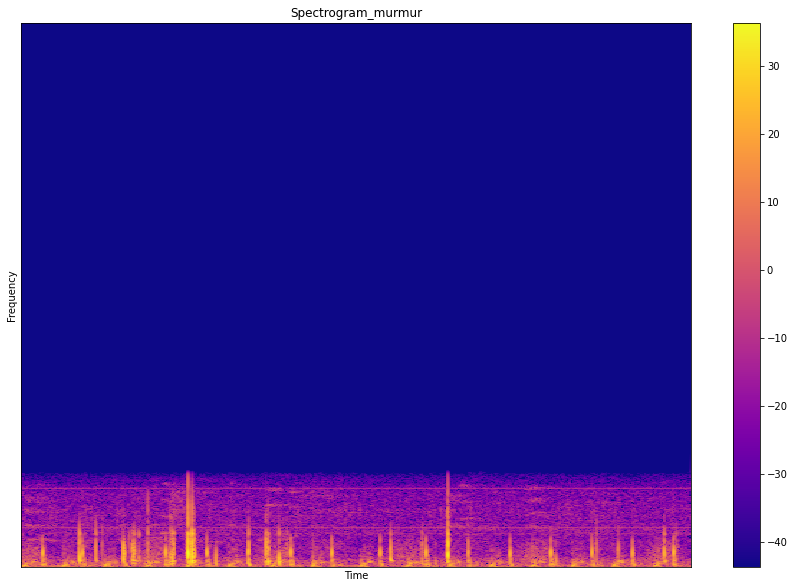

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_murmur = librosa.stft(murmur_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram_murmur = np.abs(stft_murmur)
log_spectrogram_murmur = librosa.amplitude_to_db(spectrogram_murmur)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_murmur")

### MFCCs

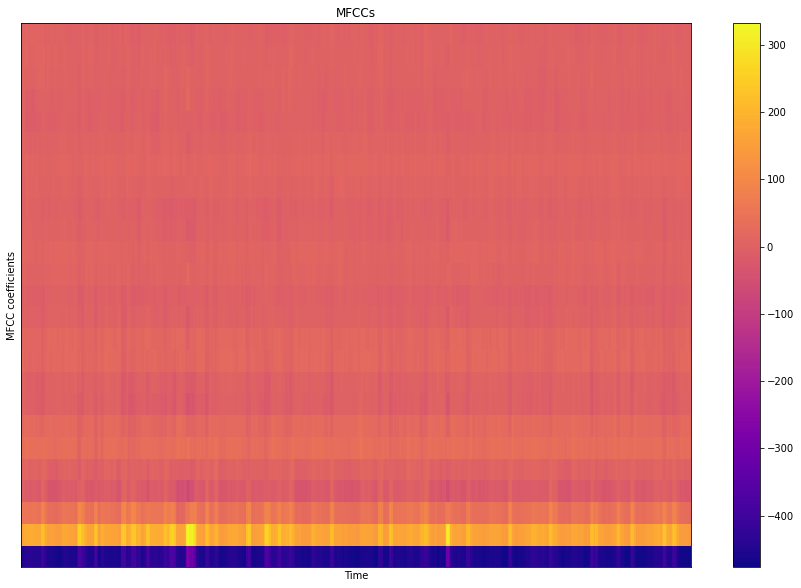

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs_murmur = librosa.feature.mfcc(murmur_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("MFCCs")

# show plots
plt.show()

## *3. Extrastole sound*

• Extrasystole sounds may appear occasionally and can be
identified because there is a heart sound that is out of rhythm
involving extra or skipped heartbeats, e.g. a “lub-lub dub” or a
“lub dub-dub”.

In [ ]:
# Choose random soud from extrastole folder
random_extrastole= np.random.randint(0,len(os.listdir(extrastole_data))) 
extrastole_sound = os.listdir(extrastole_data)[random_extrastole]
extrastole_sound_address = extrastole_data+extrastole_sound
extrastole_sound_sample,sample_rate = librosa.load(extrastole_sound_address)
ipd.Audio(extrastole_sound_sample,rate=sample_rate)

### Waveform

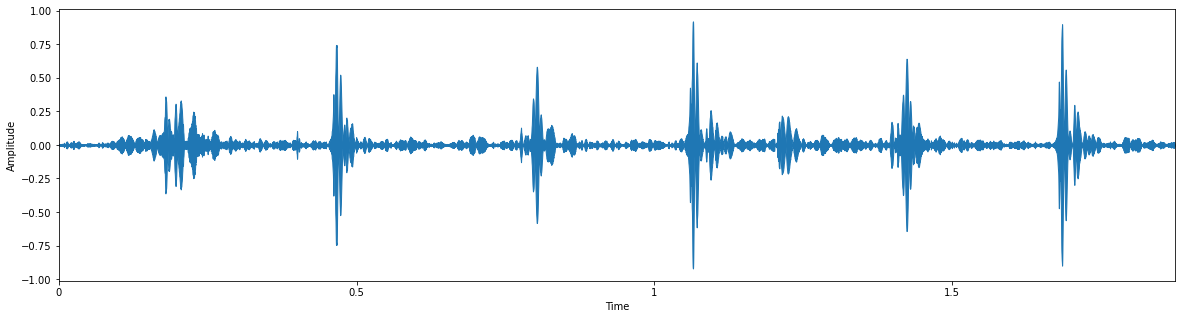

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(extrastole_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

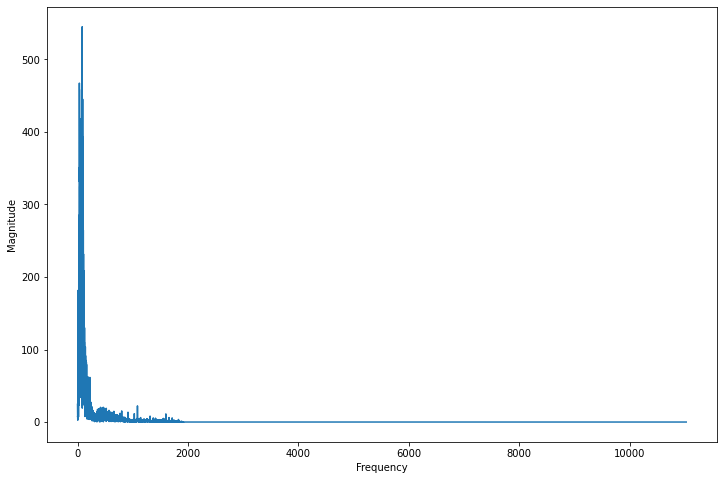

In [ ]:
fft_extrastole = np.fft.fft(extrastole_sound_sample)
magnitude_extrastole = np.abs(fft_extrastole)
freq_extrastole = np.linspace(0,sample_rate, len(magnitude_extrastole)) 
half_freq = freq_extrastole[:int(len(freq_extrastole)/2)]
half_magnitude = magnitude_extrastole[:int(len(freq_extrastole)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrastole')

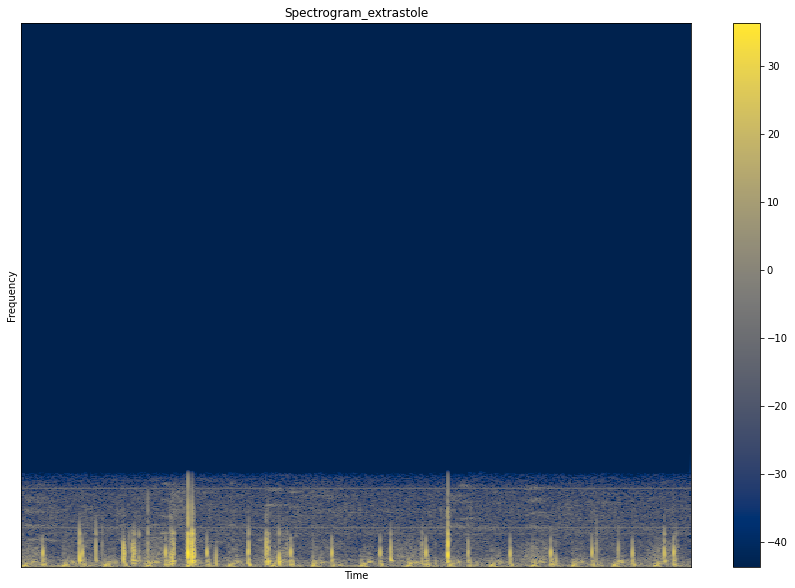

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_extrastole = librosa.stft(extrastole_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram_extrastole = np.abs(stft_extrastole)
log_spectrogram_extrastole = librosa.amplitude_to_db(spectrogram_extrastole)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("Spectrogram_extrastole")

### MFCCs

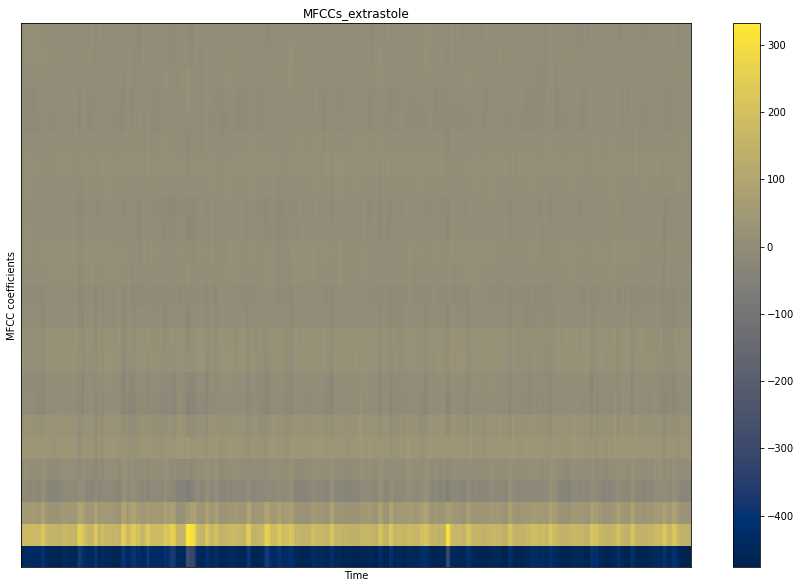

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs_extrastole = librosa.feature.mfcc(extrastole_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("MFCCs_extrastole")

# show plots
plt.show()

## *4. Artifact sound*

• In the Artifact category there are a wide range of different
sounds, including feedback squeals and echoes, speech, music
and noise.

In [ ]:
# Choose random soud from artifact folder
random_artifact= np.random.randint(0,len(os.listdir(artifact_data))) 
artifact_sound = os.listdir(artifact_data)[random_artifact]
artifact_sound_address = artifact_data+artifact_sound
artifact_sound_sample,sample_rate = librosa.load(artifact_sound_address)
ipd.Audio(artifact_sound_sample,rate=sample_rate)

In [ ]:
artifact_sound_address

'/content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201106061233.wav'

### Waveform

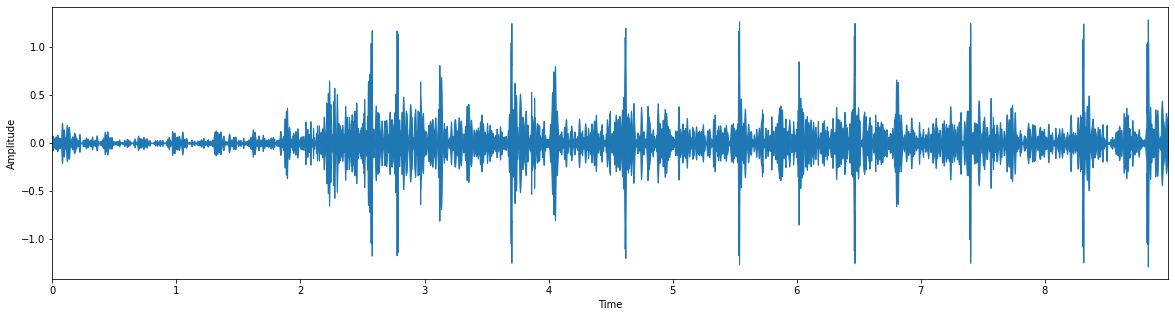

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(artifact_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

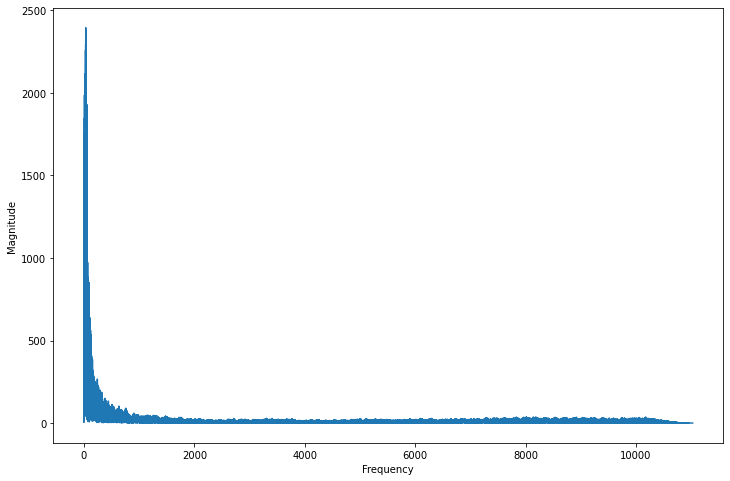

In [ ]:
fft_artifact = np.fft.fft(artifact_sound_sample)
magnitude_artifact = np.abs(fft_artifact)
freq_artifact = np.linspace(0,sample_rate, len(magnitude_artifact)) 
half_freq = freq_artifact[:int(len(freq_artifact)/2)]
half_magnitude = magnitude_artifact[:int(len(freq_artifact)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_artifacte')

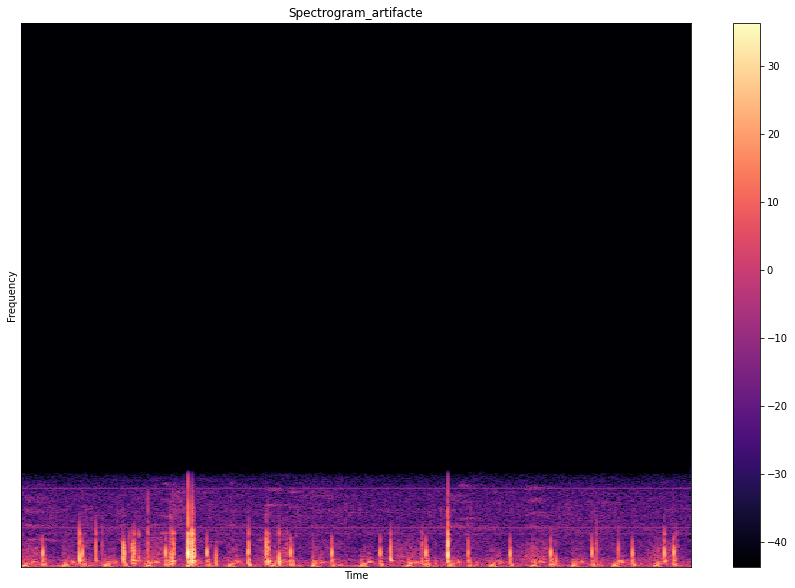

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_artifact = librosa.stft(artifact_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram_artifact = np.abs(stft_artifact)
log_spectrogram_artifact = librosa.amplitude_to_db(spectrogram_artifact)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("magma")
plt.title("Spectrogram_artifacte")

### MFCCs

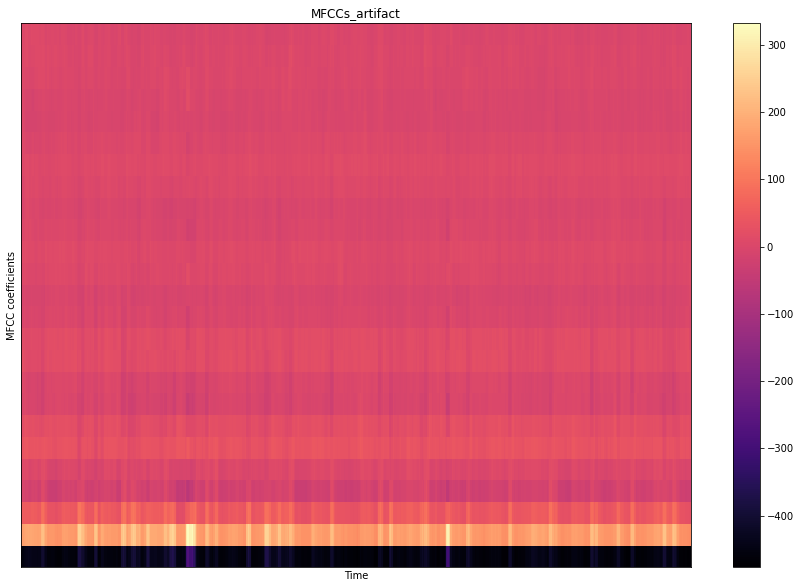

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs_artifact = librosa.feature.mfcc(artifact_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("magma")
plt.title("MFCCs_artifact")

# show plots
plt.show()

## *5. Extrahls sound*

Extra heart sounds can be identified because there is an
additional sound, e.g. a “lub-lub dub” or a “lub dub-dub”. 

In [ ]:
# Choose random soud from extrahls folder
random_extrahls= np.random.randint(0,len(os.listdir(extrahls_data))) 
extrahls_sound = os.listdir(extrahls_data)[random_extrahls]
extrahls_sound_address = extrahls_data+extrahls_sound
extrahls_sound_sample,sample_rate = librosa.load(extrahls_sound_address)
ipd.Audio(extrahls_sound_sample,rate=sample_rate)

### Waveform

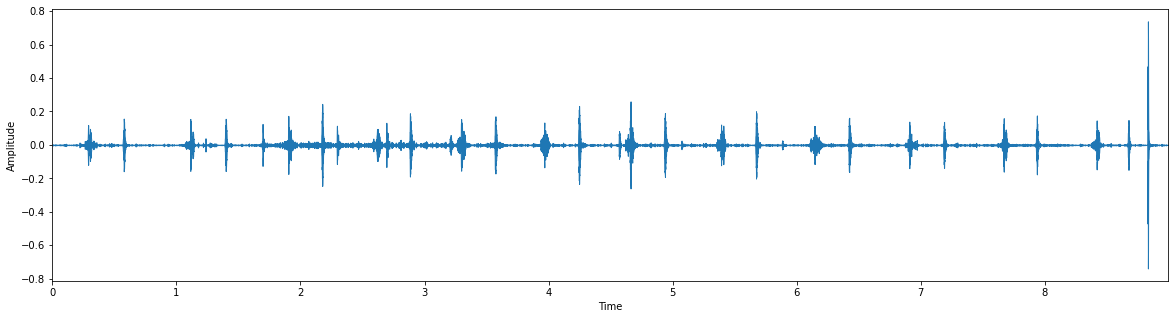

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(extrahls_sound_sample, sr = sample_rate)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

### Spectrum

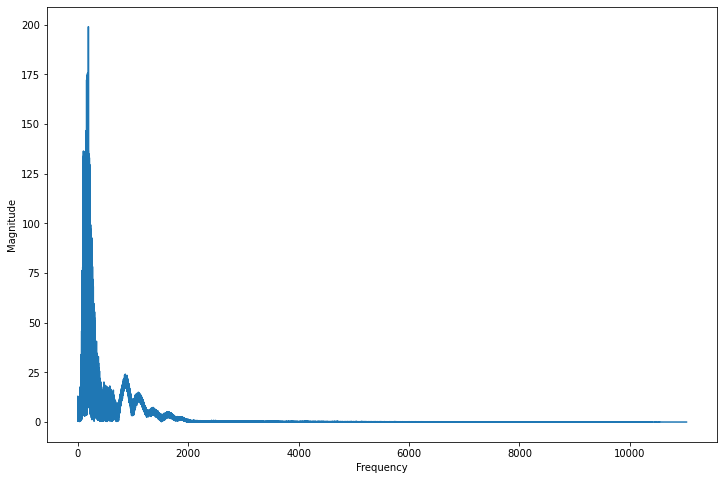

In [ ]:
fft_extrahls = np.fft.fft(extrahls_sound_sample)
magnitude_extrahls = np.abs(fft_extrahls)
freq_extrahls = np.linspace(0,sample_rate, len(magnitude_extrahls)) 
half_freq = freq_extrahls[:int(len(freq_extrahls)/2)]
half_magnitude = magnitude_extrahls[:int(len(freq_extrahls)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### Spectogram

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrahlse')

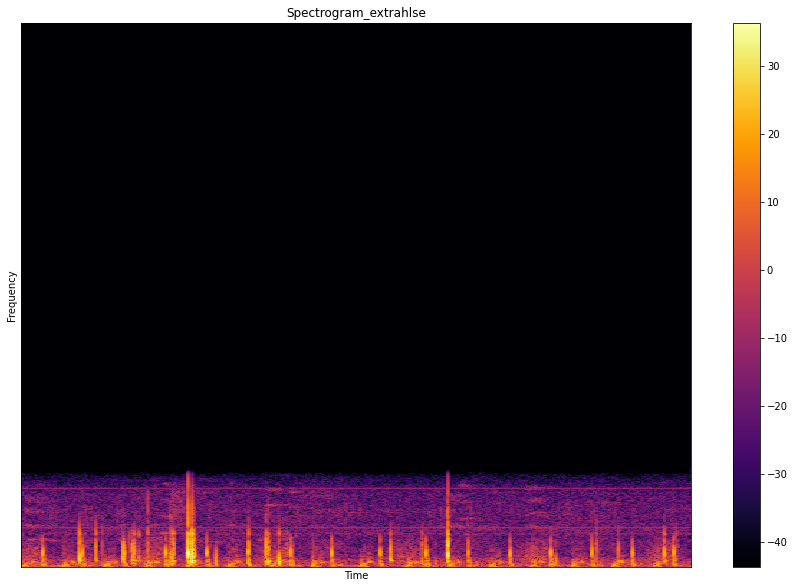

In [ ]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_extrahls = librosa.stft(extrahls_sound_sample, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram_extrahls = np.abs(stft_extrahls)
log_spectrogram_extrahls = librosa.amplitude_to_db(spectrogram_extrahls)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("Spectrogram_extrahlse")

### MFCCs

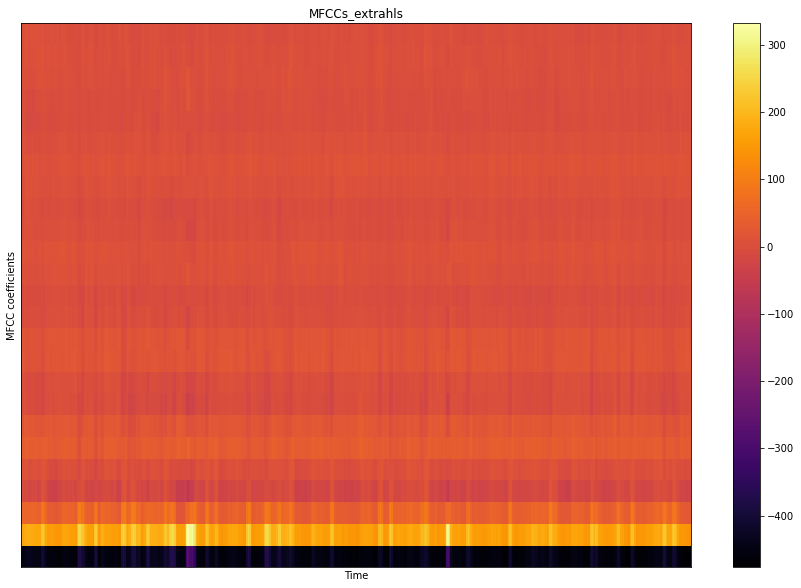

In [ ]:
# MFCCs
# extract 25 MFCCs
MFCCs_extrahls = librosa.feature.mfcc(extrahls_sound_sample, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("MFCCs_extrahls")

# show plots
plt.show()

# Loading Data

In [ ]:
def load_file_data (folder, file_names, duration=10, sr=22050):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            X, sr = librosa.load( sound_file, sr=sr, duration=duration) 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=25).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

#  preprocessing : 

## *Encoding*

In [ ]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['artifact','murmur','normal']
# {'artifact': 0, 'murmur': 1, 'normal': 3}
NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


In [ ]:
# 22 KHz
SAMPLE_RATE = 22050
# seconds
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]


extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("loaded dataset")


load file  /content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201105280851.wav
fixing audio lenght : artifact__201105280851.wav
load file  /content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201105051017.wav
fixing audio lenght : artifact__201105051017.wav
load file  /content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201105061143.wav
fixing audio lenght : artifact__201105061143.wav
load file  /content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201105041959.wav
fixing audio lenght : artifact__201105041959.wav
load file  /content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201106021541.wav
fixing audio lenght : artifact__201106021541.wav
load file  /content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201106030612.wav
fixing audio lenght : artifact__201106030612.wav
load file  /content/drive/MyDrive/heartbeat_sounds//artifact/artifact__201106010602.wav
fixing audio lenght : artifact__201106010602.wav
load file  /content/drive/MyDrive/heartbe

In [ ]:
# test files
Bunlabelledtest_files = fnmatch.filter(os.listdir(val_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=val_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(val_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=val_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("loaded test dataset")


load file  /content/drive/MyDrive/heartbeat_sounds//unlabel/Bunlabelledtest__146_1306778707532_D31.wav
fixing audio lenght : Bunlabelledtest__146_1306778707532_D31.wav
load file  /content/drive/MyDrive/heartbeat_sounds//unlabel/Bunlabelledtest__222_1308336218979_B.wav
fixing audio lenght : Bunlabelledtest__222_1308336218979_B.wav
load file  /content/drive/MyDrive/heartbeat_sounds//unlabel/Bunlabelledtest__237_1308750231222_C1.wav
fixing audio lenght : Bunlabelledtest__237_1308750231222_C1.wav
load file  /content/drive/MyDrive/heartbeat_sounds//unlabel/Bunlabelledtest__175_1307987962616_C.wav
fixing audio lenght : Bunlabelledtest__175_1307987962616_C.wav
load file  /content/drive/MyDrive/heartbeat_sounds//unlabel/Bunlabelledtest__167_1307111318050_D.wav
fixing audio lenght : Bunlabelledtest__167_1307111318050_D.wav
load file  /content/drive/MyDrive/heartbeat_sounds//unlabel/Bunlabelledtest__229_1308594979317_C.wav
fixing audio lenght : Bunlabelledtest__229_1308594979317_C.wav
load file 

## *concatenation*

In [ ]:
#combine set-a and set-b 
x_data = np.concatenate((artifact_sounds, normal_sounds,extrahls_sounds,murmur_sounds,extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels,extrahls_labels,murmur_labels,extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  578 247


In [ ]:
x_data.shape

(578, 25, 1)

## *train_test_validation split*


In [ ]:
# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

In [ ]:
print ("label shape: ", y_data.shape)
print ("data size of the array: : %s" % y_data.size)
print ("length of one array element in bytes: ", y_data.itemsize)
print ("total bytes consumed by the elements of the array: ", y_data.nbytes)
print (y_data[1])
print ("")
print ("audio data shape: ", x_data.shape)
print ("data size of the array: : %s" % x_data.size)
print ("length of one array element in bytes: ", x_data.itemsize)
print ("total bytes consumed by the elements of the array: ", x_data.nbytes)
#print (x_data[1])
print ("")
print ("training data shape: ", x_train.shape)
print ("training label shape: ", y_train.shape)
print ("")
print ("validation data shape: ", x_val.shape)
print ("validation label shape: ", y_val.shape)
print ("")
print ("test data shape: ", x_test.shape)
print ("test label shape: ", y_test.shape)

label shape:  (578,)
data size of the array: : 578
length of one array element in bytes:  8
total bytes consumed by the elements of the array:  4624
0

audio data shape:  (578, 25, 1)
data size of the array: : 14450
length of one array element in bytes:  4
total bytes consumed by the elements of the array:  57800

training data shape:  (369, 25, 1)
training label shape:  (369, 3)

validation data shape:  (93, 25, 1)
validation label shape:  (93, 3)

test data shape:  (116, 25, 1)
test label shape:  (116, 3)


### Correct imbalnced data using class weight

In [ ]:
"""TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 187 #murmur
COUNT_2 = 351 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight"""

TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 129 #murmur
COUNT_2 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}

# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
"""
model = Sequential()

model.add(Bidirectional(LSTM(256), input_shape = (13,1)))
#model.add(Bidirectional(LSTM(128,return_sequences=False)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()"""

model = Sequential()

model.add(Bidirectional(LSTM(128), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_13 (Bidirecti  (None, 256)              133120    
 onal)                                                           
                                                                 
 dense_61 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_62 (Dense)            (None, 128)               16512     
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dense_64 (Dense)            (None, 64)                4160      
                                                     

In [ ]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


In [ ]:

print ("training started..... please wait.")
# training
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

print ("training finised!")

training started..... please wait.
Epoch 1/30
123/123 [==============================] - 36s 29ms/step - loss: 0.8479 - acc: 0.5230 - val_loss: 0.7650 - val_acc: 0.6989 - lr: 0.0010
Epoch 2/30
123/123 [==============================] - 3s 21ms/step - loss: 0.5401 - acc: 0.5095 - val_loss: 0.6724 - val_acc: 0.6882 - lr: 8.0000e-04
Epoch 3/30
123/123 [==============================] - 3s 21ms/step - loss: 0.5629 - acc: 0.4878 - val_loss: 1.0415 - val_acc: 0.6774 - lr: 6.4000e-04
Epoch 4/30
123/123 [==============================] - 3s 21ms/step - loss: 0.5365 - acc: 0.5935 - val_loss: 0.6826 - val_acc: 0.7634 - lr: 5.1200e-04
Epoch 5/30
123/123 [==============================] - 3s 22ms/step - loss: 0.4899 - acc: 0.5203 - val_loss: 0.6157 - val_acc: 0.7634 - lr: 4.0960e-04
Epoch 6/30
123/123 [==============================] - 3s 21ms/step - loss: 0.4923 - acc: 0.5203 - val_loss: 0.8072 - val_acc: 0.7097 - lr: 3.2768e-04
Epoch 7/30
123/123 [==============================] - 3s 22ms/step -

<Figure size 1584x720 with 0 Axes>

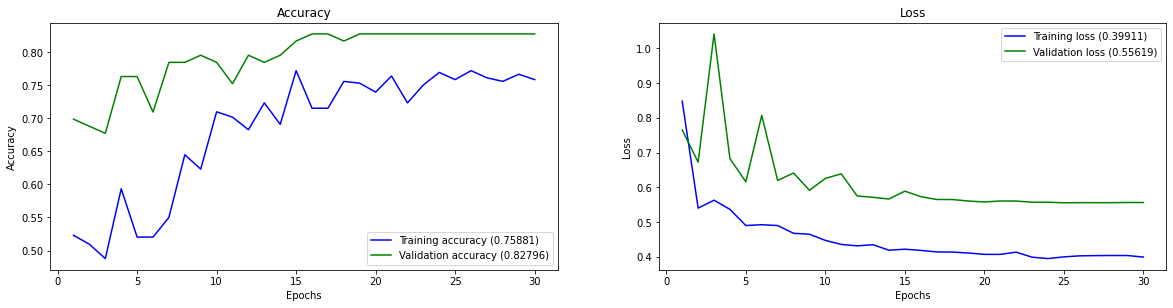

In [ ]:
#Plot Keras History
#Plot loss and accuracy for the training and validation set.
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    plt.figure(figsize=(22,10))
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Accuracy
    plt.figure(221, figsize=(20,10))
    ## Accuracy
    # plt.figure(2,figsize=(14,5))
    plt.subplot(221, title='Accuracy')
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    ## Loss
    plt.subplot(222, title='Loss')
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# plot history
plot_history(history)

# prediction


In [ ]:
# make a prediction
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

4/4 [==============================] - 1s 10ms/step - loss: 0.4888 - acc: 0.8534
Model evaluation accuracy:  85 %


# saving and loading model

In [ ]:
model.save('heart_sounds2.h5')

In [ ]:
from google.colab import files 
files.download('heart_sounds2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# prediction class 
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

prediction test return : 2 - normal


In [ ]:
y_pred_ = model.predict(x_test)
y_pred_1 = np.argmax(y_pred_,axis=1)
print ("prediction test return :",y_pred_1[1], "-", int_to_label[y_pred[1]])

prediction test return : 2 - normal


In [ ]:
y_pred_1[1]

2

In [ ]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  # pad audio file same duration
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

In [ ]:
audio1="/content/drive/MyDrive/heartbeat_sounds/artifact/artifact__201012172012.wav"
#process_audio = np.asarray(preprocessing(audio1))
process_audio1 = preprocessing(audio1)

process_audio1.shape

(1, 40, 1)

In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))


              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00         8
      murmur       0.71      0.63      0.67        27
      normal       0.88      0.91      0.90        81

    accuracy                           0.85       116
   macro avg       0.86      0.85      0.85       116
weighted avg       0.85      0.85      0.85       116



#Treatment options for abnormal heartbeat sounds:

The treatment depends on the cause. You may need to make lifestyle changes, like increasing your activity level or changing your diet (for example, limiting your caffeine intake). If you smoke, your doctor will help you stop smoking. You might also require medication to control your abnormal heartbeat, as well as any secondary symptoms.

For serious abnormalities that don’t go away with behavioral changes or medication, **your doctor can recommend:**

1- cardiac catheterization to diagnose a heart problem

2- catheter ablation to destroy tissue that causes abnormal rhythms

3- cardioversion by medication or an electrical shock to the heart

4- implantation of a pacemaker or cardioverter defibrillator

5- surgery to correct an abnormality

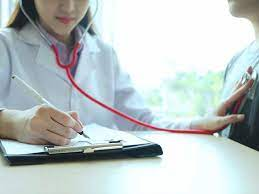